In [1]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt

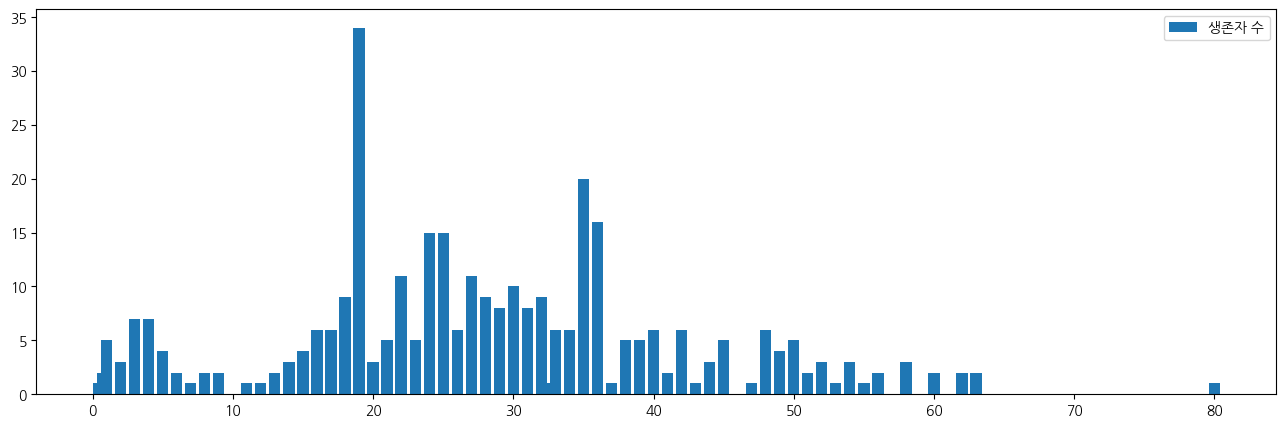

In [2]:
# (1) 생존자의 연령
DATA_FILE = '../Data/titanic_train.csv'
dataDF = pd.read_csv(DATA_FILE)
df = dataDF.copy()
df.head()
df = df[['Survived', 'Pclass', 'Sex', 'Age']]

df = df[df['Survived']==1]

df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x : x.fillna(x.median()))
df.isna().sum()

df1 = df.groupby('Age')['Survived'].sum()

plt.figure(figsize = (16, 5))
plt.bar(df1.index,df1.values,label = '생존자 수')
plt.legend()
plt.show()

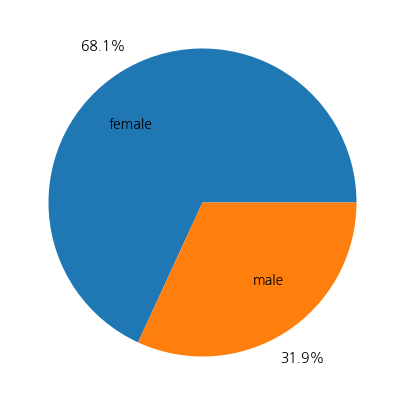

In [3]:
# (2) 생존자의 성별
df2 = df.groupby('Sex')['Survived'].sum()
plt.figure(figsize= (5,5))
plt.pie(df2.values, labels = df2.index, autopct='%1.1f%%',pctdistance=1.2, labeldistance=0.6)
plt.show()



<Axes: xlabel='Age'>

<Figure size 1400x500 with 0 Axes>

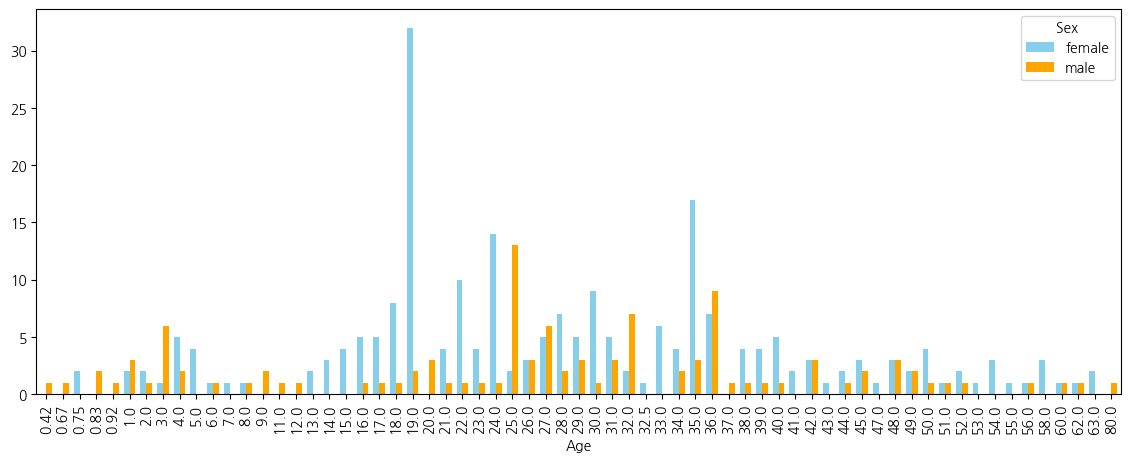

In [7]:

# (3) 생존자들의 연령과 성별 분석
df3 = df.groupby(['Age', 'Sex'])['Survived'].sum().unstack()
df3

plt.figure(figsize=(14,5))
df3.plot(kind='bar',figsize=(14,5),color=['skyblue','orange'],width= 0.7)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0
...,...,...,...,...
875,1,3,female,15.0
879,1,1,female,56.0
880,1,2,female,25.0
887,1,1,female,19.0


Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

,탑승자 수,생존자 수
Pclass,,
1,216,136
2,184,87
3,491,119


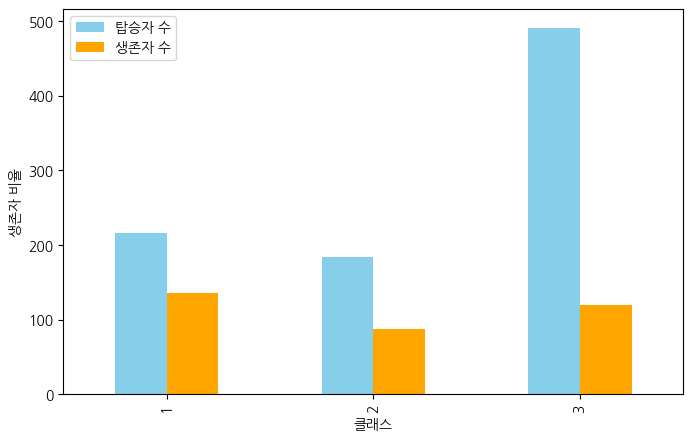

In [5]:
# (4) 등급에 따른 생존자
df4 = df.groupby('Pclass')['Survived'].sum()
display(df)
df5= dataDF.groupby('Pclass')['Survived'].count()
display(df5)
result = pd.concat([df5, df4], axis=1)
result.columns = ['탑승자 수', '생존자 수']
display(result)
result.plot( kind='bar',  figsize=(8,5),  color=['skyblue', 'orange'])
plt.xlabel('클래스')
plt.ylabel('생존자 비율')
plt.show()
